# Gravitational Waves Data Preprocessing 


In [1]:
#Requiered libaries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from gwpy.timeseries import TimeSeries, TimeSeriesDict
from gwpy.plot import Plot

- ## Helper Functions

In [2]:
#Function Purpose to Load npy Data given a path
def loadNpyData(path):
    data = np.load(path) 
    return data

In [3]:
#Function Purpose to Load CSV Data given a path
def loadCSVData(path):
    data = pd.read_csv(path)
    return data

In [4]:
#Function Purpose to return a labeled Data Frame of the Gravitational waves Time Series Data Frame
def createTSDataFrame(sample_data):
    labels = ['LIGO Hanford', 'LIGO Livingston', 'Virgo' ]
    df = pd.DataFrame(sample_data)
    df.index = labels
    return df 

In [5]:
#Function Purpose to return each time series object represented in the npy array, give Time Series Data
def read_ts_file(Time_Series_Data): 
    ts1 = TimeSeries(Time_Series_Data[0,:], sample_rate =2048)
    ts2 = TimeSeries(Time_Series_Data[1,:],sample_rate =2048)
    ts3 = TimeSeries(Time_Series_Data[2,:],sample_rate =2048)
    return  ts1, ts2, ts3

In [6]:
#Function to plot all 3 Time series individually
def plot_data(ts1, ts2, ts3):
    plot = Plot(ts1, ts2, ts3, separate=True, sharex=True, figsize=[17, 12])
    ax = plt.gca()   
    ax.set_xlim(0,2)  
    plot.axes[0].set_xlabel('Time [s]')
    plot.axes[0].set_ylabel('GW Amplitude [Strain]')
    plot.axes[1].set_xlabel('Time [s]')
    plot.axes[1].set_ylabel('GW Amplitude [Strain]')
    plot.axes[2].set_xlabel('Time [s]')
    plot.axes[2].set_ylabel('GW Amplitude [Strain]')
    plot.show()

In [7]:
#Ploting all time series in one plot
def plot_data_jointly(ts1, ts2, ts3):  
    plot = Plot(figsize=(15, 9))
    ax = plot.add_subplot(xscale='auto-gps')
    ax.plot(ts1, color='gwpy:ligo-hanford', label='LIGO-Hanford')
    ax.plot(ts2, color='gwpy:ligo-livingston', label='LIGO-Livingston')
    ax.plot(ts3, color='gwpy:virgo', label='Virgo')
    ax.set_xlim(0, 2)
    ax.set_ylabel('Gravitational Waves Amplitude')
    ax.set_xlabel('Time [s]')
    ax.set_title("Joint Plot of Time Series")
    ax.legend()
    plot.show()

- ## Loading Sample Data

In [8]:
#Loading sample data from given path
path1_signal = "../../../Group Project/data/train/0/0/0/000270b7cc.npy" #Signal
path_no_signal = "../../../Group Project/data/train/0/0/0/000295765e.npy" #No Signal

#Loading 2D Npy Arrays and storing into variable
sample_data_signal = loadNpyData(path1_signal)
sample_no_signal = loadNpyData(path_no_signal)

In [9]:
#Storing each timeseries (from each device), for both timeseries with a signal and no signal
ts_signal1,  ts_signal2,  ts_signal3 = read_ts_file(sample_data_signal)
ts_no_signal1,  ts_no_signal2,  ts_no_signal3 = read_ts_file(sample_no_signal)

/Users/Robin1/opt/anaconda3/envs/COMP_542/lib/python3.9/site-packages/gwpy/plot/plot.py:287: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  super().show(warn=warn)


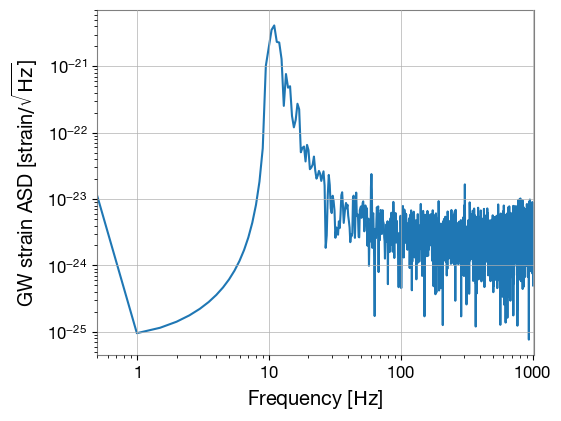

In [10]:
#FFT and plot of data after Calculatin=g the FFT
spectrum = ts_signal1.asd(2)
plot = spectrum.plot()
ax = plot.gca()
ax.set_xlim()
ax.set_ylabel(r'GW strain ASD [strain$/\sqrt{\mathrm{Hz}}$]')
plot.show()


- ##  Ploting Time Series Sample Data

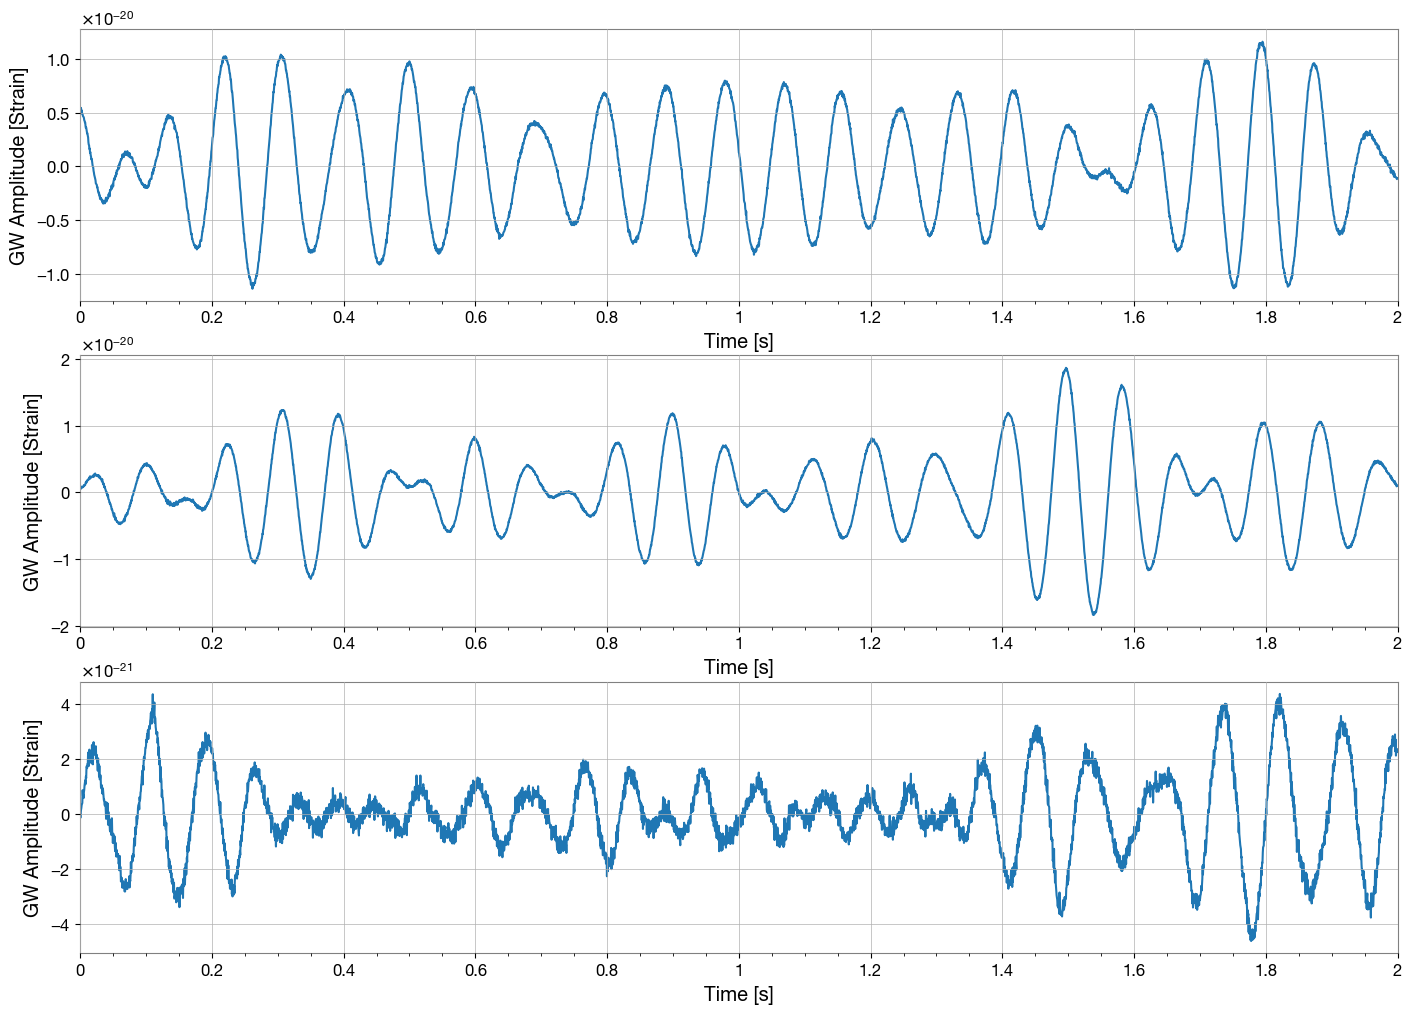

In [11]:
#ploting time Series with signal
plot_data(ts_signal1,  ts_signal2,  ts_signal3)

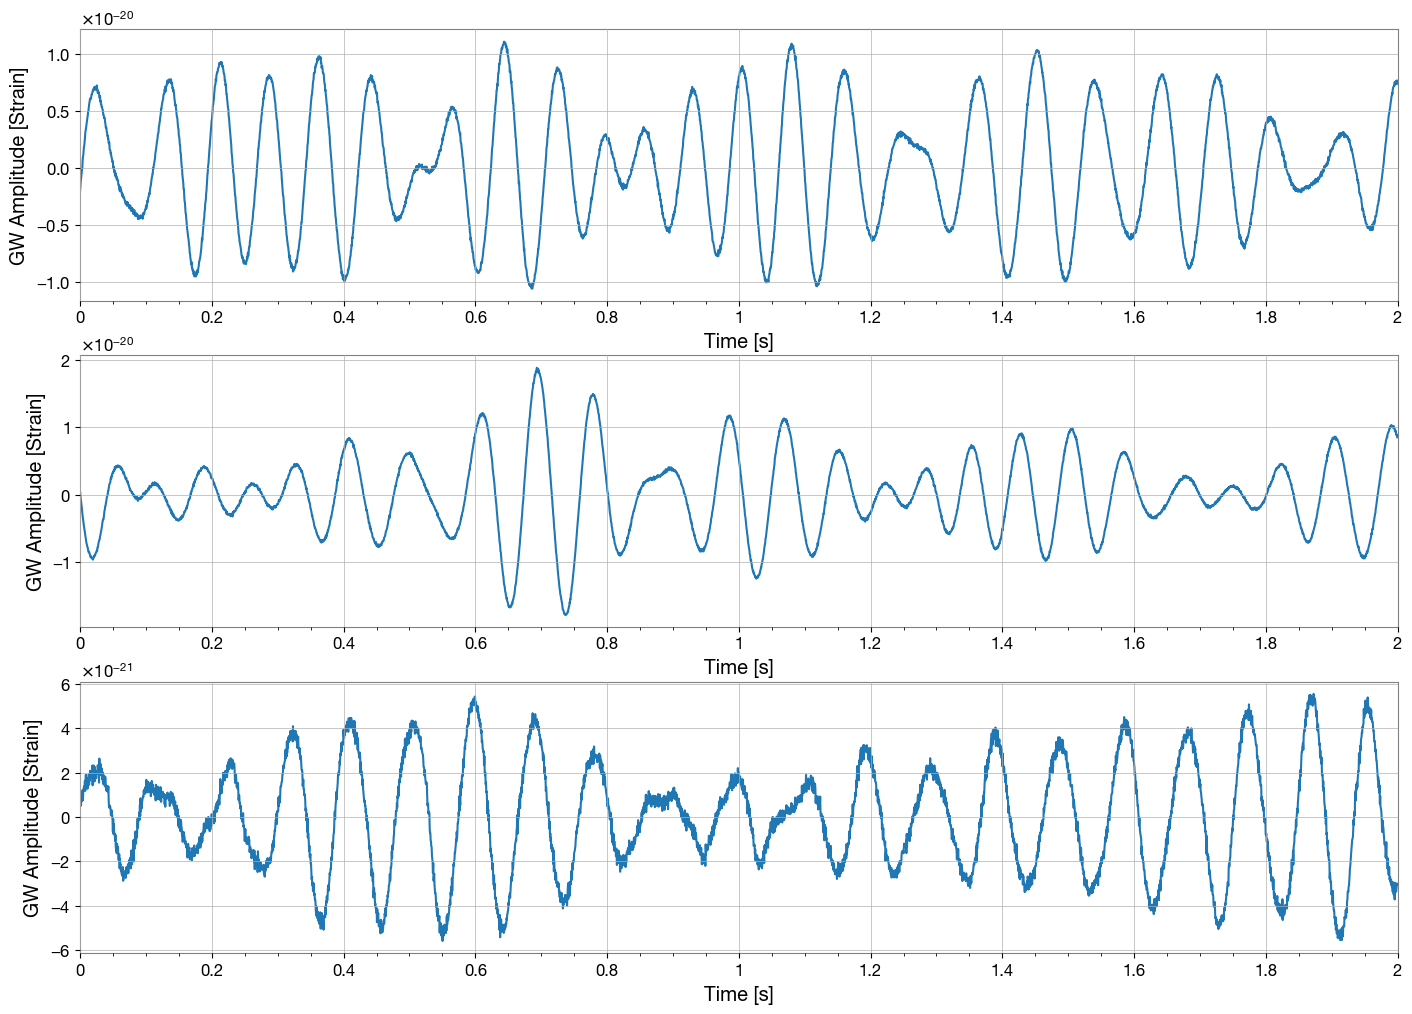

In [12]:
#ploting time Series without a signal
plot_data(ts_no_signal1,  ts_no_signal2,  ts_no_signal3)

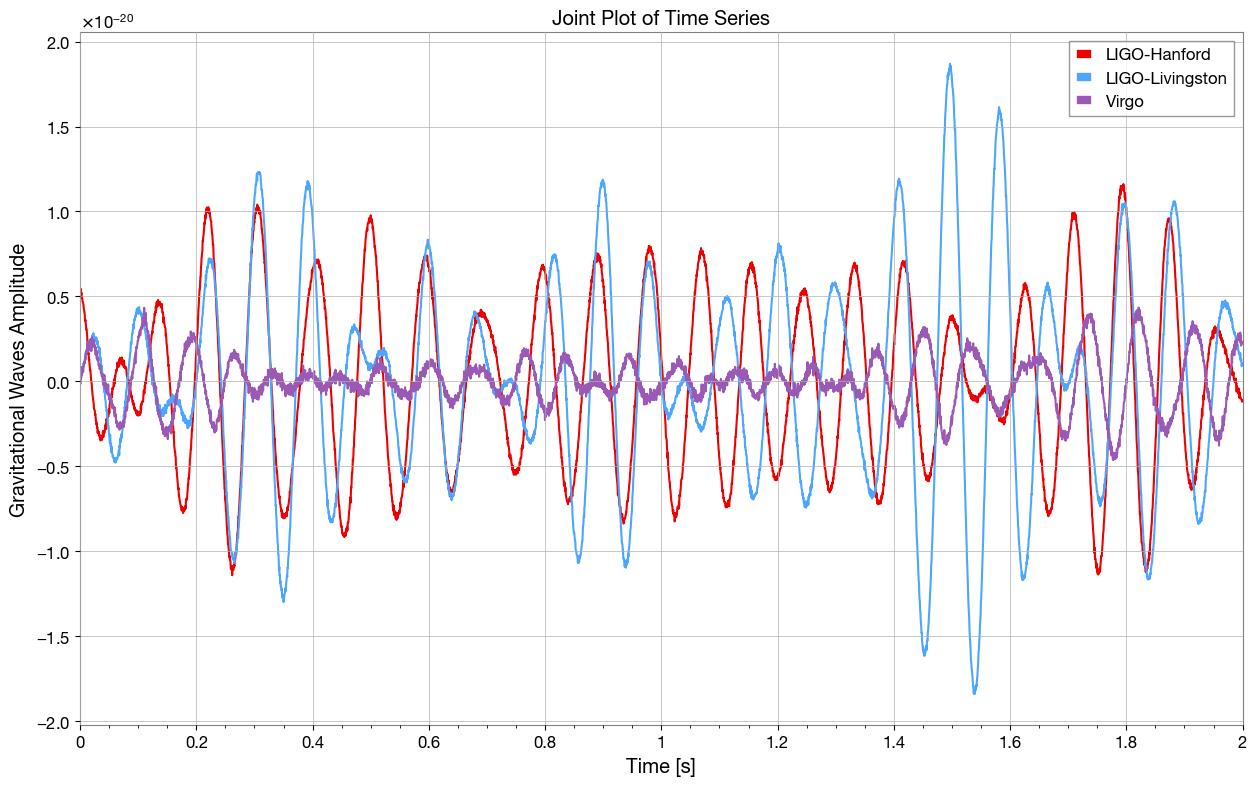

In [13]:
#Joint plot of time series with a signal
plot_data_jointly(ts_signal1,  ts_signal2,  ts_signal3)

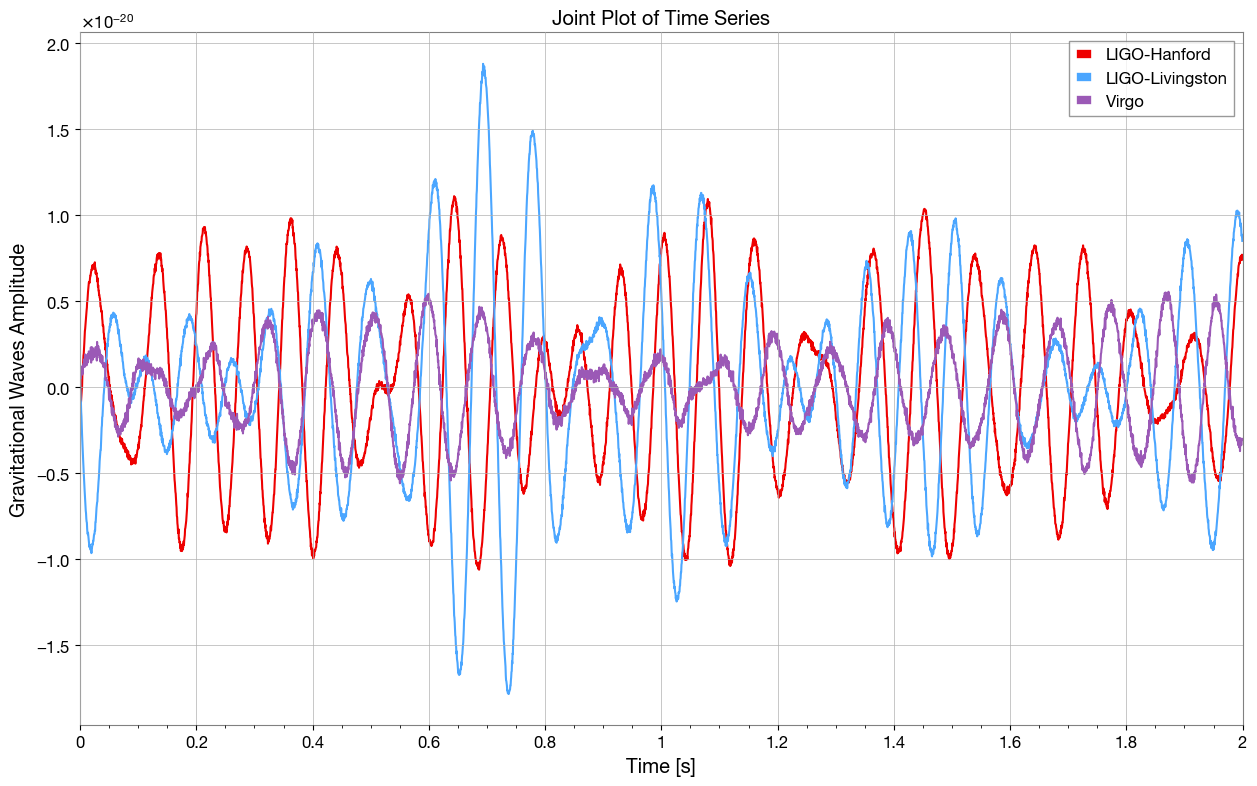

In [14]:
#Joint plot of time series without a signal
plot_data_jointly(ts_no_signal1,  ts_no_signal2,  ts_no_signal3)

[Text(0.5, 1.0, 'Not Whiten')]

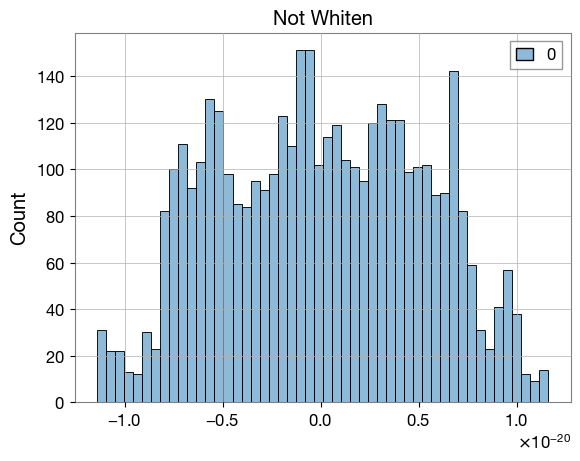

In [15]:
#ploting to check the distribution of the Data
ts_signal1_df = pd.DataFrame(ts_signal1)
sns.histplot(ts_signal1_df, bins =50).set(title ="Not Whiten")

- <font size = 4> We observe there is no visual diffrence, between a timeseris file with or withouth a signal.

- ## Filtering Methods

In [30]:
#Function to whiten the TimeSeries data
def whitenTimeSeries(ts1,ts2,ts3):
    transitionRegion = 0.2
    ts1_whiten = ts1.whiten(2, window=('tukey',transitionRegion))
    ts2_whiten = ts2.whiten(2, window=('tukey',transitionRegion))
    ts3_whiten = ts3.whiten(2, window=('tukey',transitionRegion))
    return ts1_whiten, ts2_whiten, ts3_whiten

In [31]:
#Methond To Generate And Plot the Q-Transform of the Data
def qSpectrogramPlot(ts):
    qspecgram =ts.q_transform(qrange=(20,30), frange=(35,350))
    plot = qspecgram.plot(figsize=[20, 15])
    ax = plot.gca()
    ax.set_xscale('seconds')
    ax.set_yscale('log')
    ax.set_ylabel('Frequency [Hz]')
    ax.grid(True, axis='y', which='both')
    ax.colorbar(cmap='viridis', label='Normalized energy')
    plot.show()

- ## Whitening

In [32]:
#Storing Whiten Time Series In Variables, and Ploting
ts1_whiten, ts2_whiten, ts3_whiten = whitenTimeSeries(ts_signal1,ts_signal2,ts_signal3)

/Users/Robin1/opt/anaconda3/envs/COMP_542/lib/python3.9/site-packages/gwpy/plot/plot.py:287: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  super().show(warn=warn)


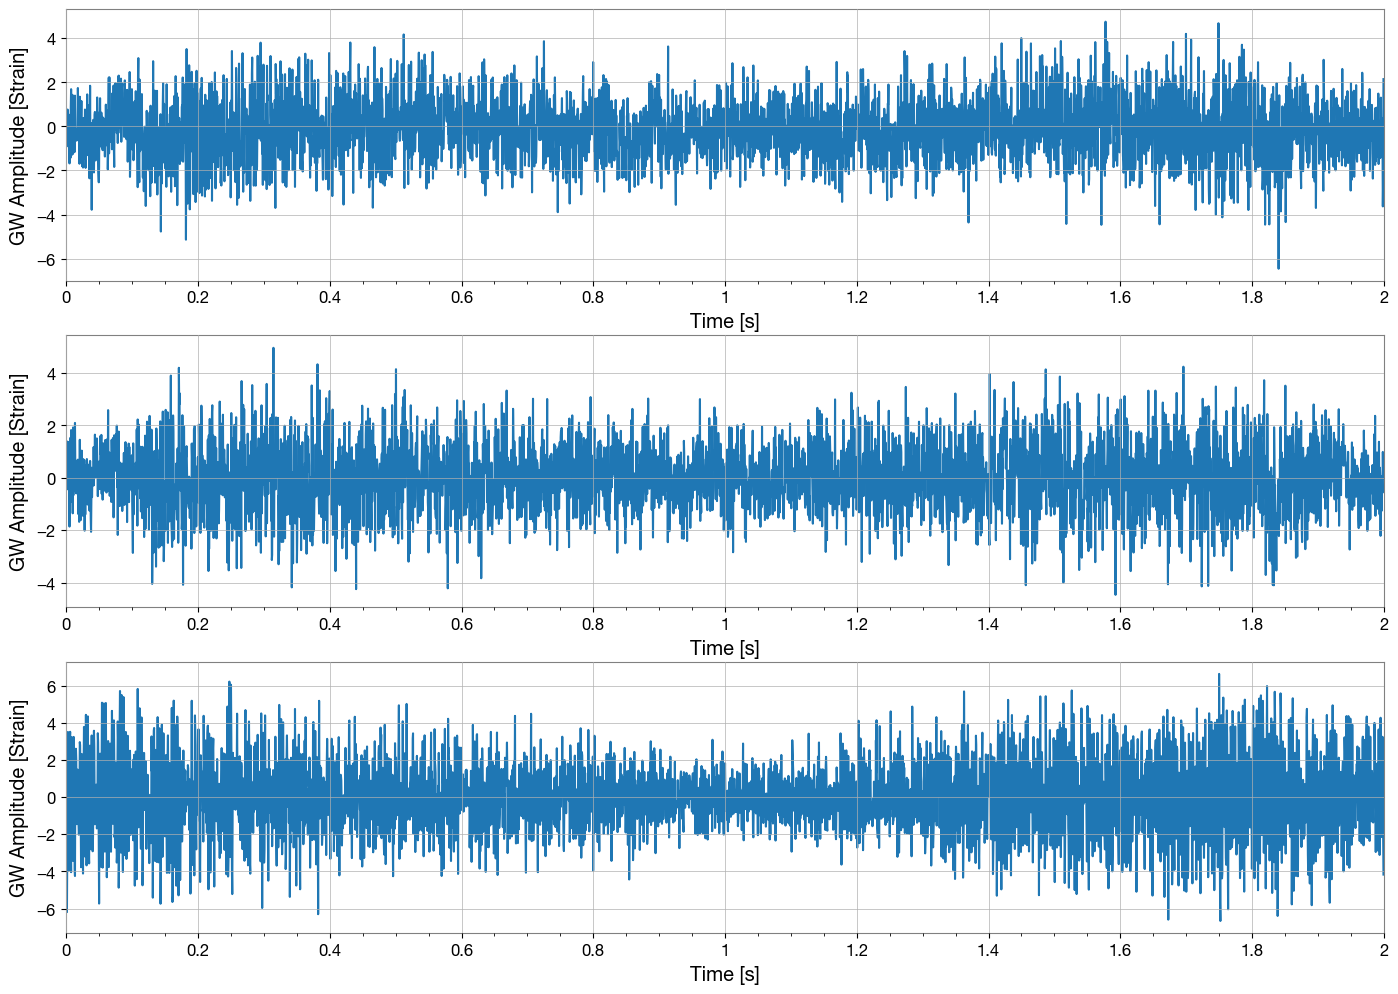

In [33]:
#Ploting the data after a Whiten filter was applied to data with a signal
plot_data(ts1_whiten, ts2_whiten,ts3_whiten)

[Text(0.5, 1.0, 'Time Series Whiten')]

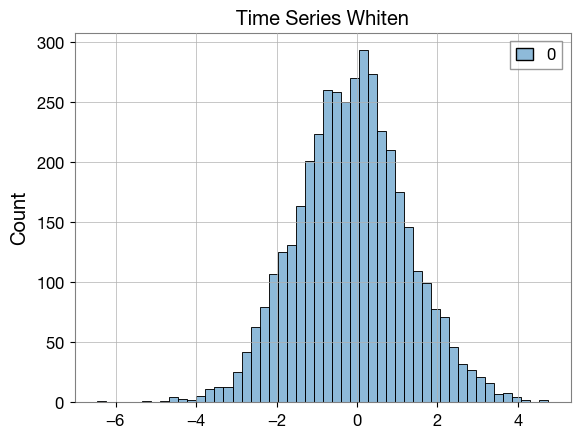

In [34]:
#ploting to check the distribution of the Data
ts1_whiten_df = pd.DataFrame(ts1_whiten)
sns.histplot(ts1_whiten_df).set(title = "Time Series Whiten")

/Users/Robin1/opt/anaconda3/envs/COMP_542/lib/python3.9/site-packages/gwpy/plot/plot.py:287: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  super().show(warn=warn)


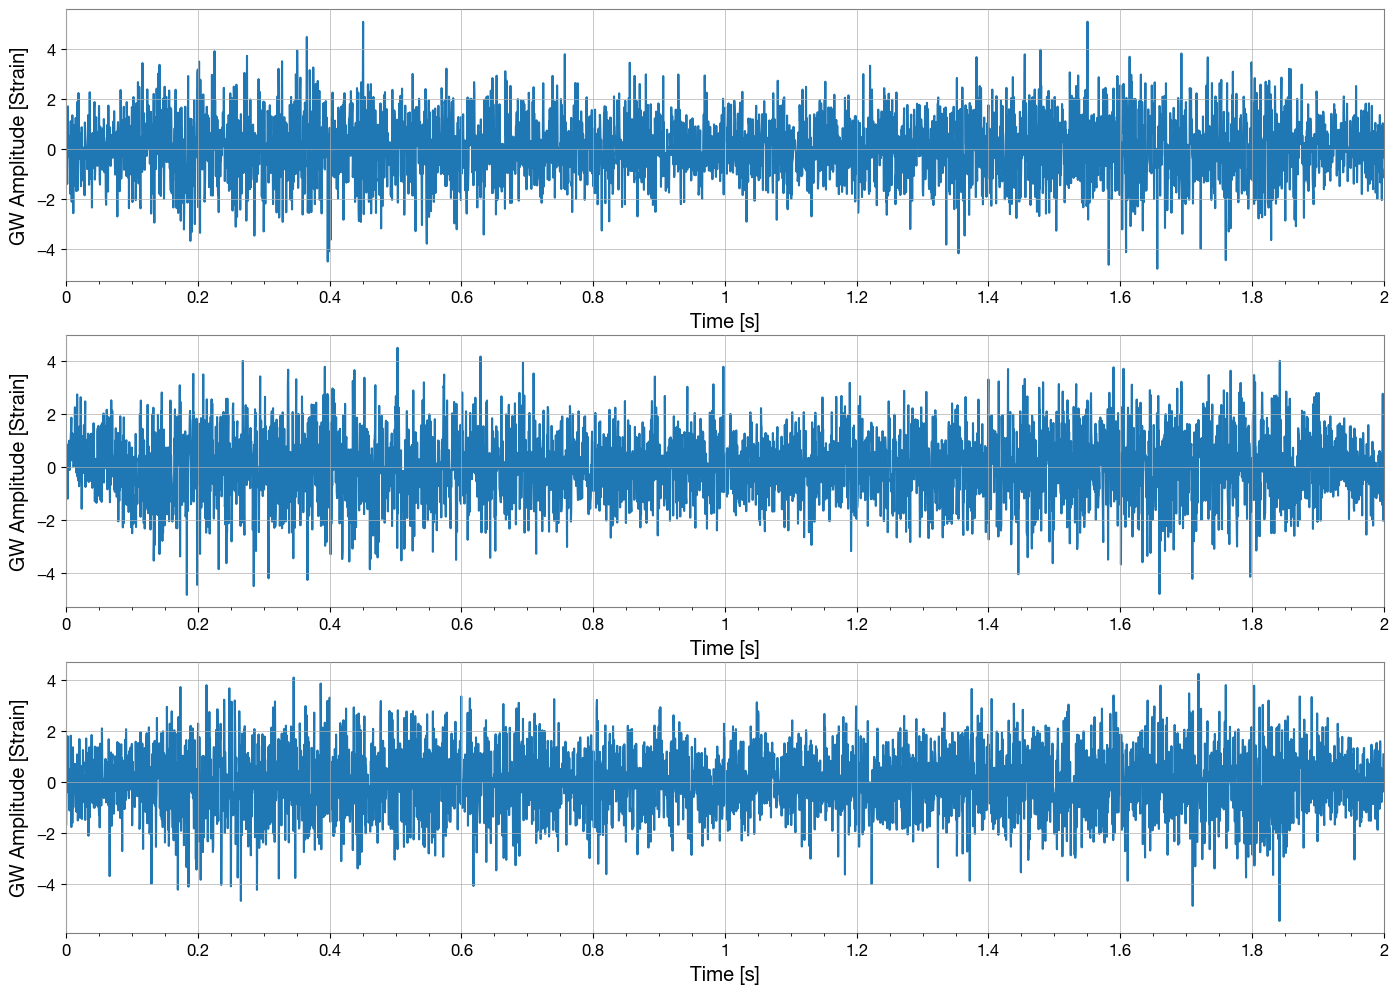

In [35]:
#Storing Whiten Time Series In Variables, and Ploting, for file without signal
ts1_no_whiten, ts2_no_whiten, ts3_no_whiten = whitenTimeSeries(ts_no_signal1,ts_no_signal2,ts_no_signal3)
plot_data(ts1_no_whiten, ts2_no_whiten, ts3_no_whiten)

- ## Q transform

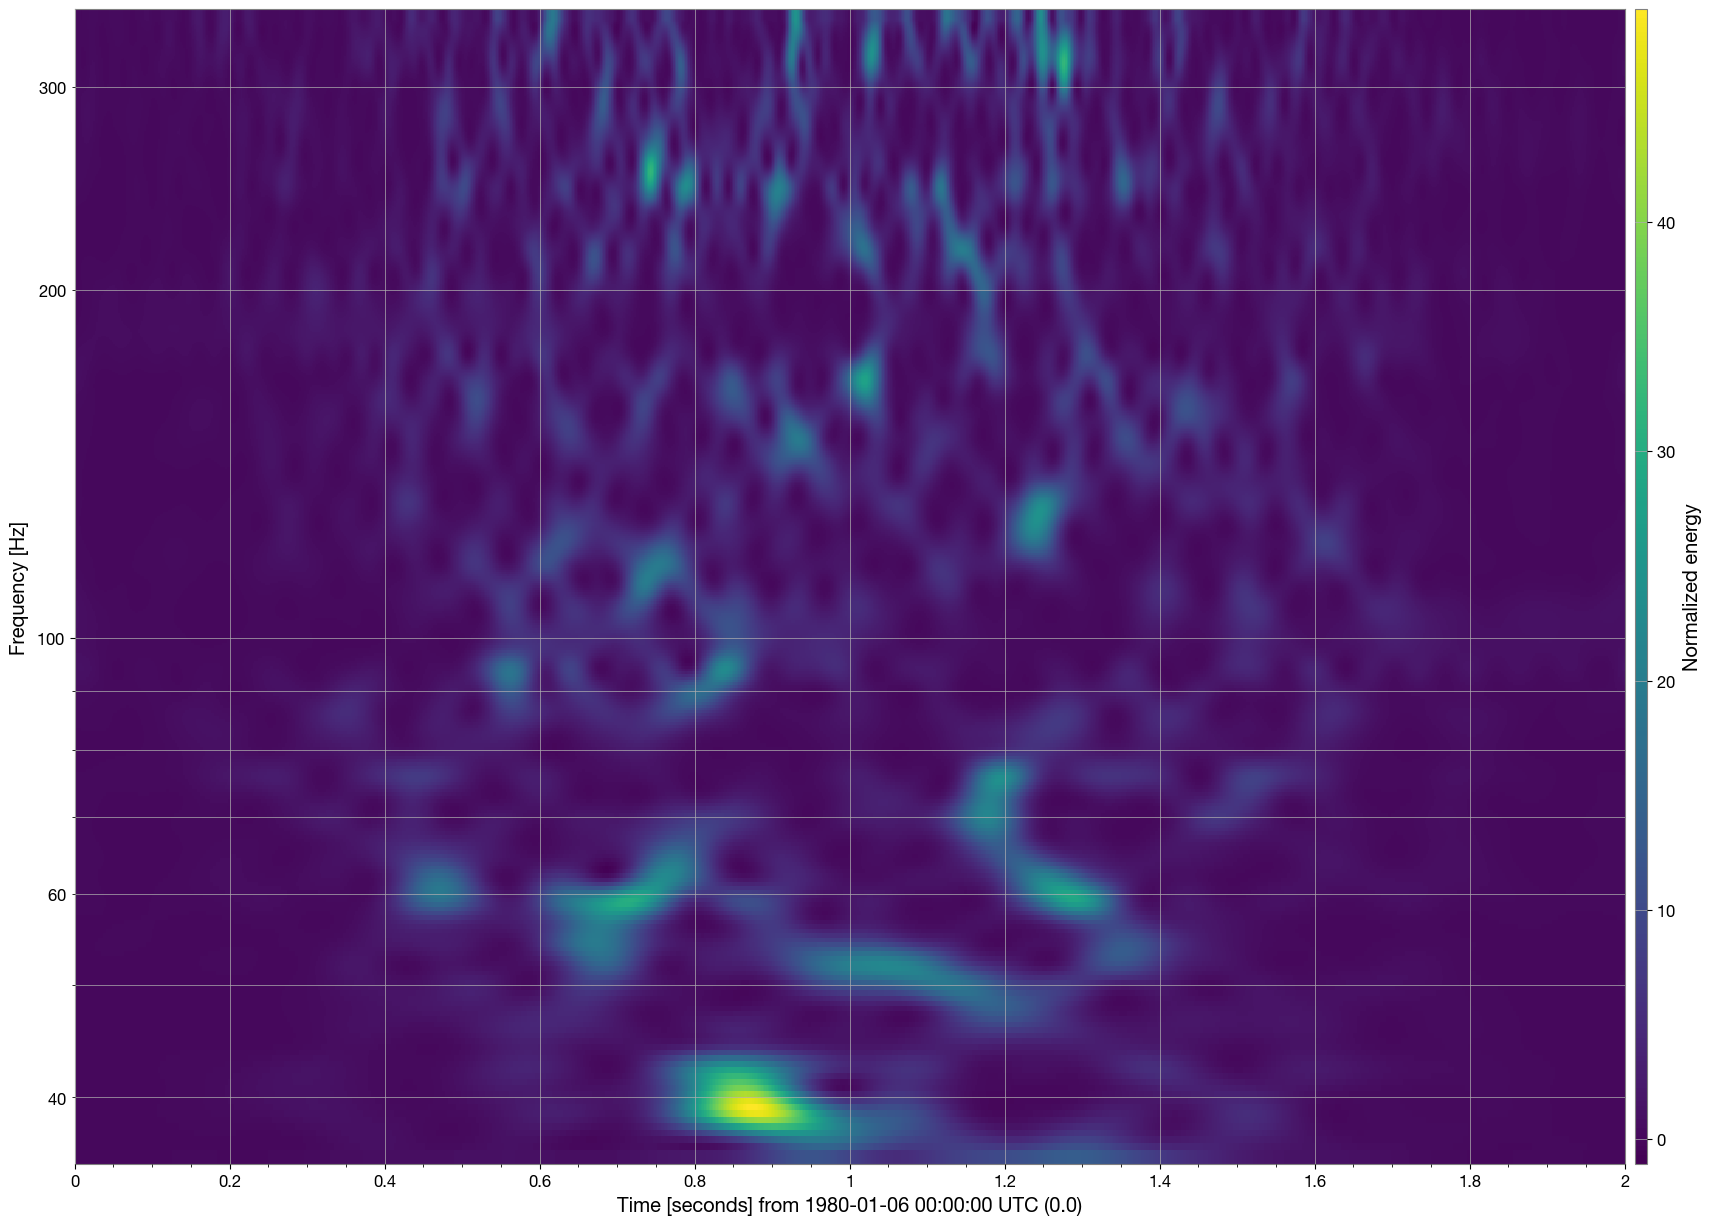

In [36]:
# Q transform Spectrogram Gravitatntional Wave time series without a signal
qSpectrogramPlot(ts1_whiten)

In [37]:
# Applying Filtertin and Generating Q Transform of data withjout a Signal Present
ts1_no_whiten, ts2_no_whiten, ts3_no_whiten = whitenTimeSeries(ts_no_signal1,  ts_no_signal2,  ts_no_signal3)

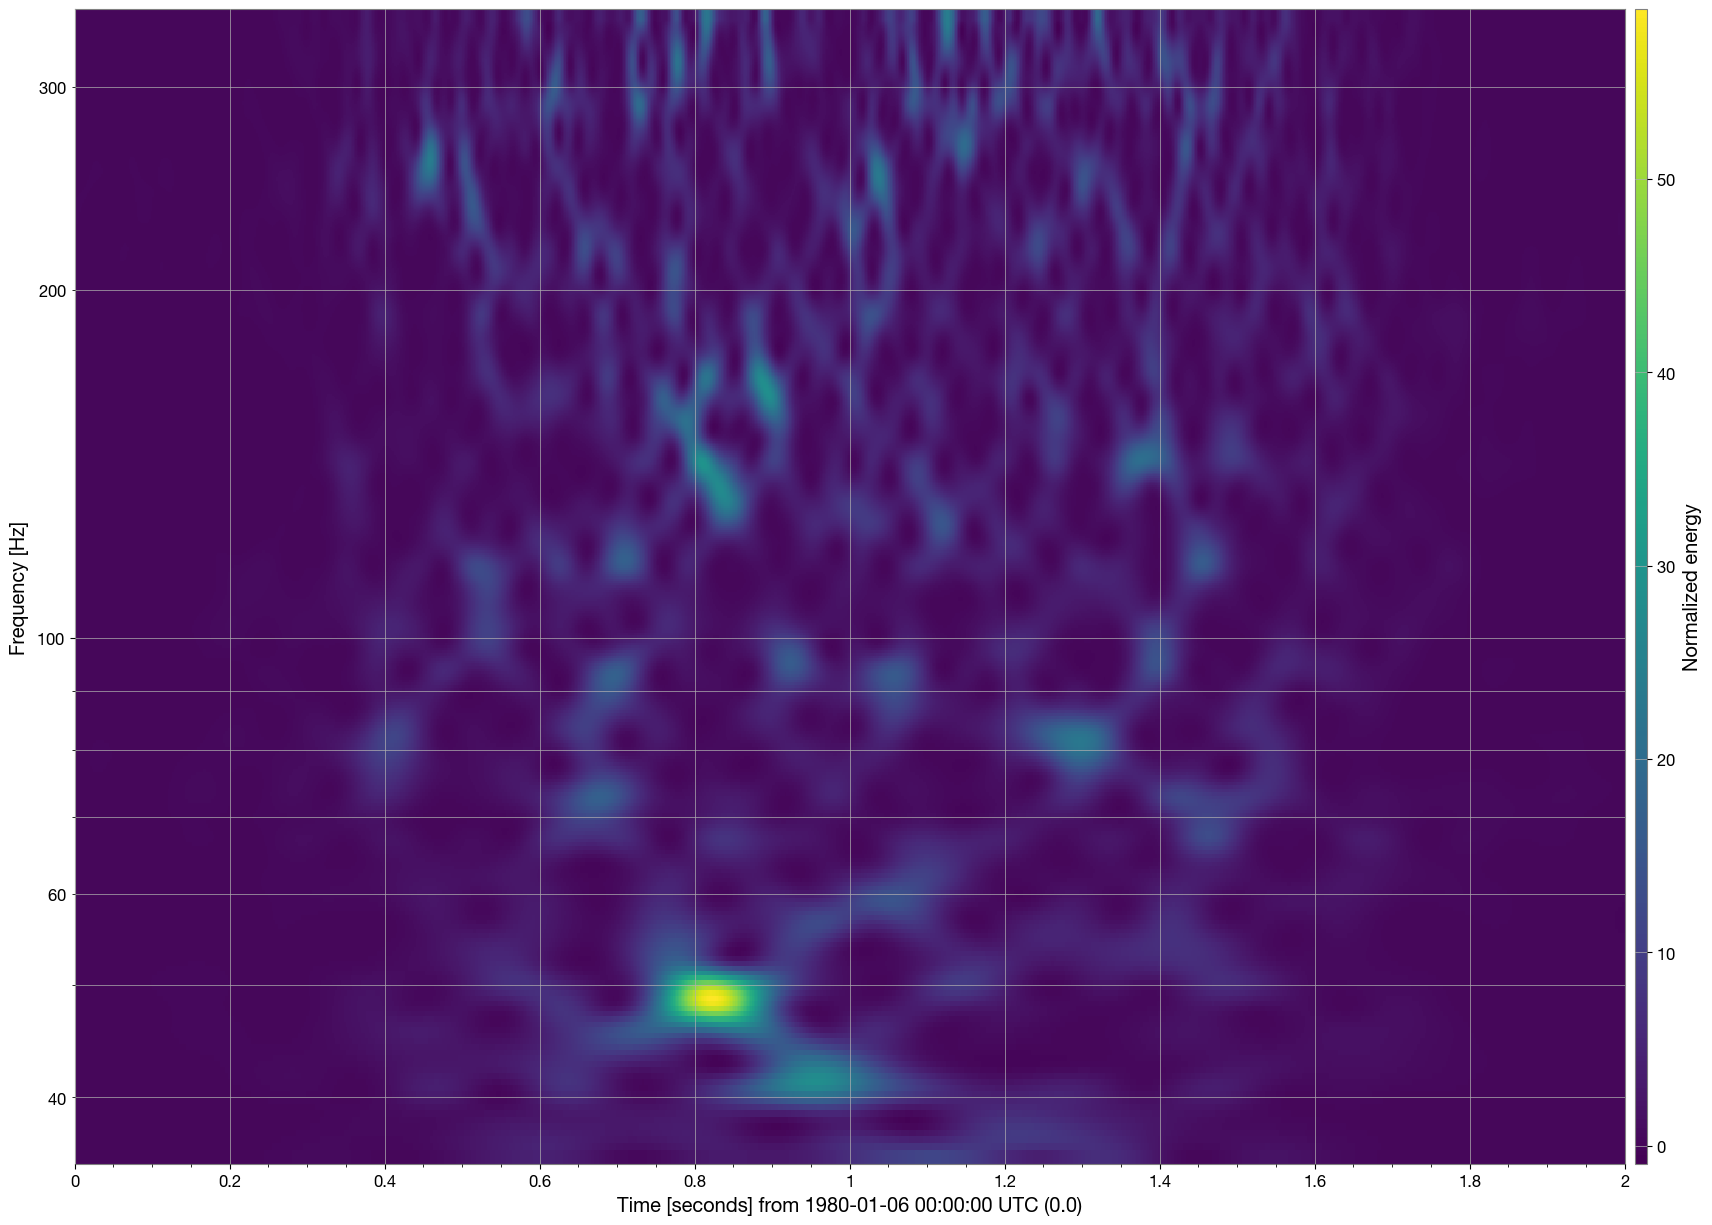

In [24]:
#Ploting Spctogram for Data with no signal
qSpectrogramPlot(ts1_no_whiten)

- ## Training Label Data Analysis

In [25]:
#Loading training Labels File
training_path = "../../data/training_labels.csv"
training_labels = pd.read_csv(training_path)

In [26]:
#Calling Training Labels
training_labels

id  target
0       00000e74ad       1
1       00001f4945       0
2           661522       0
3       00007a006a       0
4       0000a38978       1
...            ...     ...
559995  ffff9a5645       1
559996  ffffab0c27       0
559997  ffffcf161a       1
559998  ffffd2c403       0
559999  fffff2180b       0

[560000 rows x 2 columns]

<AxesSubplot: xlabel='target', ylabel='count'>

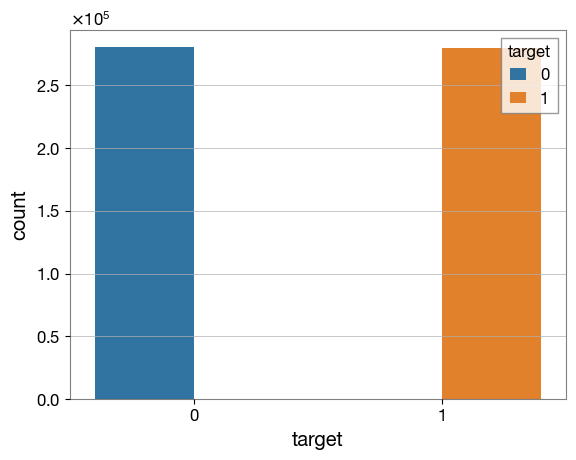

In [27]:
#Plotning a count plot to chck if training labels are balanced
sns.countplot(data = training_labels,x= "target", hue = "target")

- <font size = 4> We observe that the Training labels data set is balanced 

In [28]:
#Chacking Training Labels For Null Valulese
training_labels.isnull().sum()

id        0
target    0
dtype: int64

- <font size = 4> We observe that there are no null values in our data set

In [29]:
#Ploting Data Frame of Sample Data
createTSDataFrame(sample_data_signal)

0             1             2             3     \
LIGO Hanford     5.385747e-21  5.478708e-21  5.310930e-21  5.403542e-21   
LIGO Livingston  5.578608e-22  6.934627e-22  5.111967e-22  7.919860e-22   
Virgo            4.960842e-24 -1.503198e-22  2.758679e-23  1.411913e-22   

                         4             5             6             7     \
LIGO Hanford     5.141398e-21  5.213304e-21  4.920970e-21  4.938202e-21   
LIGO Livingston  7.174032e-22  8.602278e-22  7.698284e-22  7.117108e-22   
Virgo            2.088518e-22  3.170335e-22  3.566986e-22  3.905835e-22   

                         8             9     ...          4086          4087  \
LIGO Hanford     4.826197e-21  4.673405e-21  ... -6.378553e-22 -8.967851e-22   
LIGO Livingston  7.937068e-22  8.222814e-22  ...  1.658408e-21  1.352559e-21   
Virgo            8.534974e-22  6.500302e-22  ...  2.601013e-21  2.561383e-21   

                         4088          4089          4090          4091  \
LIGO Hanford    -8.791729e-22 -9.846498e-22 -9.949791e-22 -1.010331e-21   
LIGO Livingston  1.655137e-21  1.234956e-21  1.256104e-21  1.329621e-21   
Virgo            2.877040e-21  2.262260e-21  2.689246e-21  2.109997e-21   

                         4092          4093          4094          4095  
LIGO Hanford    -1.078300e-21 -1.114581e-21 -1.191760e-21 -1.099783e-21  
LIGO Livingston  1.135184e-21  8.996502e-22  1.054450e-21  1.036106e-21  
Virgo            2.345062e-21  2.229364e-21  2.348622e-21  2.253580e-21  

[3 rows x 4096 columns]